## Data Visualization ##

In [4]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
# read the cleaned dataset from parquet
df = pd.read_parquet('cleaned_walamrt_data.parquet')

### 1. Profit By Category ###
To identify which product catefories generate the most profit

category
Fashion accessories       192314.8932
Home and lifestyle        192213.6381
Electronic accessories     30772.4895
Food and beverages         21552.8622
Sports and travel          20613.8082
Health and beauty          18671.7345
Name: total_profit, dtype: float64


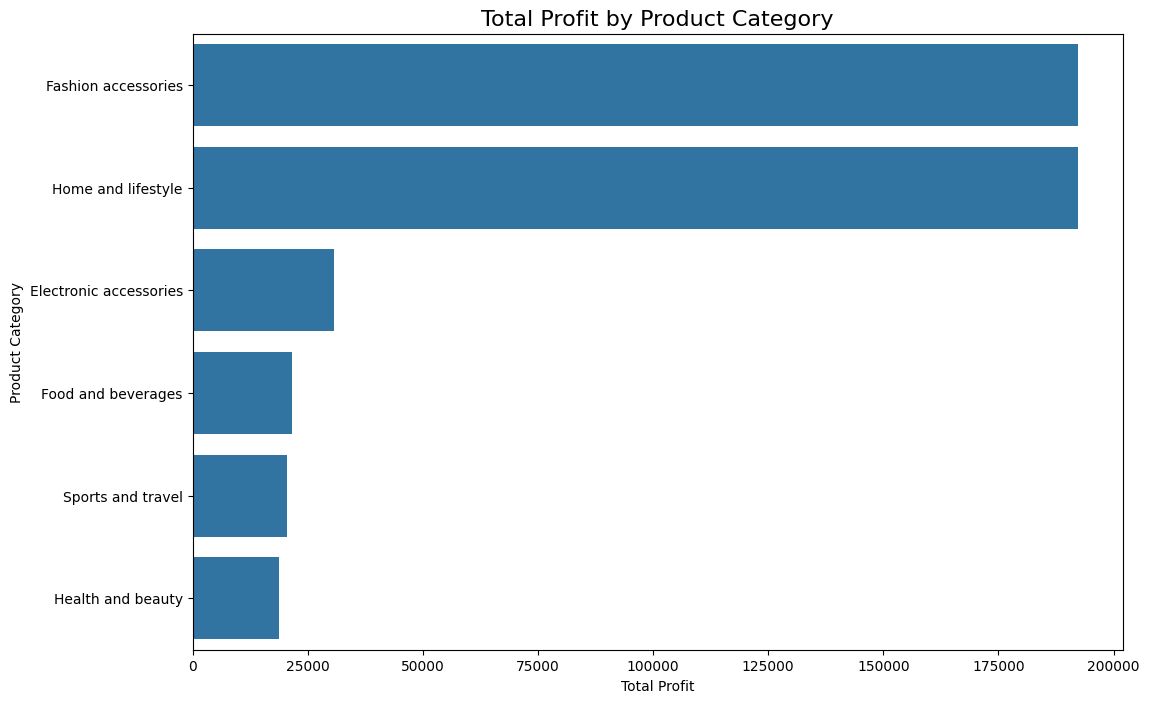

In [10]:
# Group data by catefory and calculate the sum of total profit for each
pro_by_cat = df.groupby('category')['total_profit'].sum().sort_values(ascending=False)
print(pro_by_cat)

# create the plot
plt.figure(figsize=(12,8))
sns.barplot(x=pro_by_cat.values,
            y=pro_by_cat.index,
            orient='h')
plt.title('Total Profit by Product Category', fontsize=16)
plt.xlabel('Total Profit')
plt.ylabel('Product Category')

# display
plt.show()

The chart shows that Fashion Accessories and Home and Lifestyle are the top profit-generating categories, each earning close to $195,000 and together accounting for over 80% of the total profit. This suggests strong customer demand, effective pricing, or high-margin products in these segments. In contrast, Electronic Accessories ranks third with a much lower profit of around $30,000, contributing less than 16% of what each top category earns.
The remaining categories—Food and Beverages, Sports and Travel, and Health and Beauty—each generate approximately $22,000, collectively representing under 10% of total profit. Their similarly low performance suggests limited sales volume or thinner profit margins. Overall, the chart reveals a heavy concentration of profit in two key categories, indicating a need to focus growth strategies there while reassessing the profitability and potential of the lower-performing segments.

### 2. Customer Rating and Profit Margin ###
Using scatter  plot to explore the relationship between **Rating** and **Profit_margin**

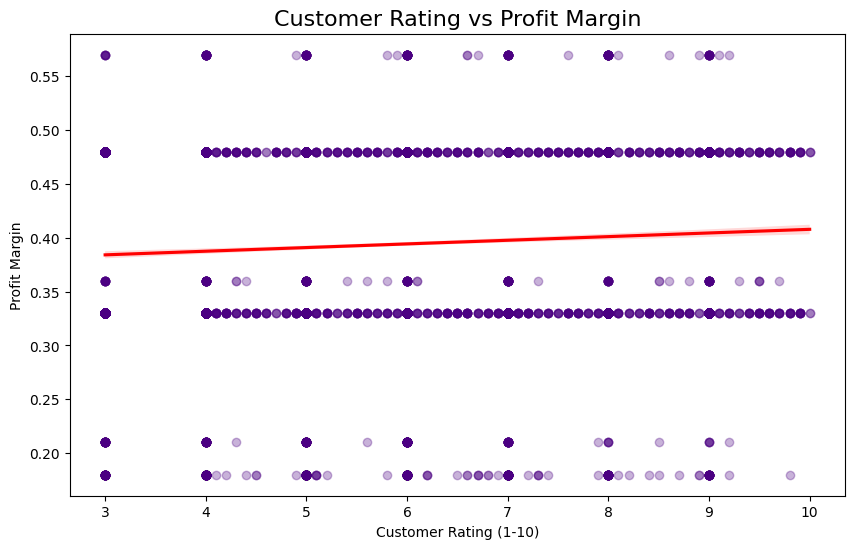

In [12]:
# Create scatter plot with regressionn line
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='rating', y='profit_margin',
            scatter_kws={'alpha':0.3, 'color': 'indigo'},
            line_kws={'color':'red'})
plt.title('Customer Rating vs Profit Margin', fontsize=16)
plt.xlabel('Customer Rating (1-10)')
plt.ylabel('Profit Margin')

# display
plt.show()

The scatter plot shows a weak positive correlation between Customer Rating (1–10) and Profit Margin, as indicated by the slight upward slope of the red regression line. For example, at lower ratings (around 3 to 4), profit margins range broadly from 0.18 to 0.57, while at higher ratings (around 9 to 10), profit margins still vary across a similar range, mostly between 0.33 and 0.57. This suggests that while higher ratings are slightly associated with higher margins, the relationship is not strong.
The data clusters heavily around three main profit margin levels: approximately 0.18, 0.33, and 0.48. These horizontal bands across all rating levels indicate that many products or transactions fall into fixed pricing or margin tiers, regardless of customer rating. For instance, many ratings from 6 to 9 are densely concentrated around 0.33 and 0.48, showing where most high-rated purchases occur.
Despite the upward trend line, the wide vertical spread at each rating level (e.g., margins between 0.18 and 0.57 even for a rating of 8) confirms that customer rating alone does not strongly predict profit margin. Other factors such as product category, cost structure, or promotional strategy likely play a more significant role in determining margin.

### 3. Daily Sales Trends ###
Using line chart to show how **total_sales** change over time.


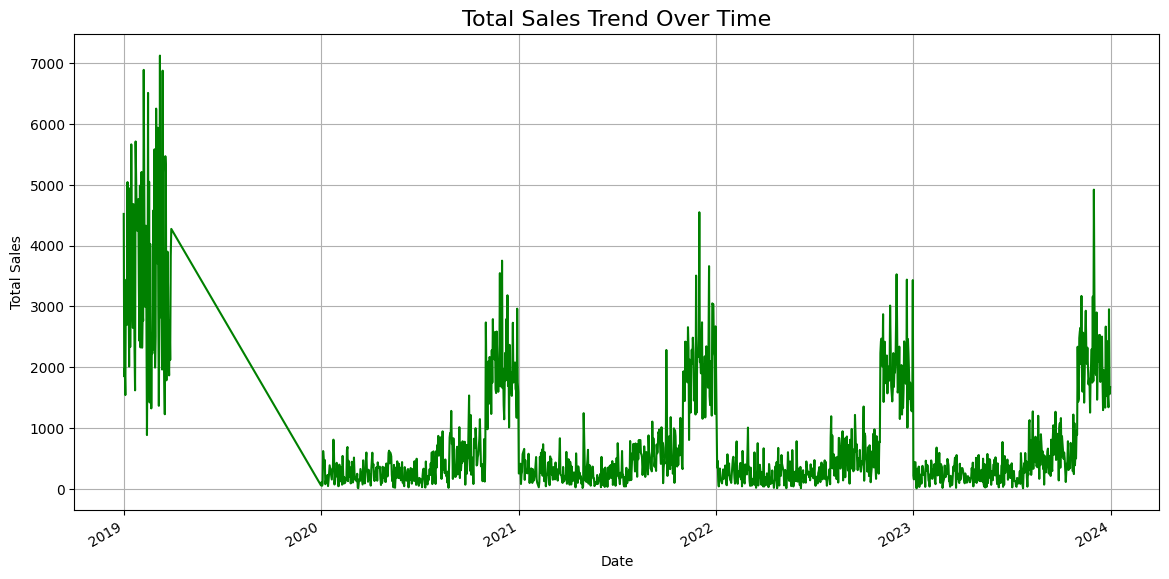

In [14]:
# Group data by date and calculate the sum of total_sale for each day
daily_sales = df.groupby('date')['total_sales'].sum()

# Create the line plot
plt.figure(figsize=(14, 7))
daily_sales.plot(kind='line', color='green')

# Add titles and labels
plt.title('Total Sales Trend Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)  # Adds a grid for easier reading

# Display the plot
plt.show()

The chart shows the total sales trend from 2019 to 2024, starting with very high and volatile sales in early 2019, followed by a sharp decline toward the end of that year. From 2020 onward, sales remained low with occasional spikes, indicating a possible shift in business strategy or external disruption such as the pandemic. Starting in 2021, a clear seasonal pattern emerges, with regular sales spikes around the same time each year—likely driven by holiday promotions or annual events. While overall baseline sales remain modest, the business appears to have stabilized with consistent seasonal peaks, suggesting a focus on periodic high-impact sales campaigns.